# SET_2

# Question 1

In [1]:
import scipy.stats as stats

# Given parameters
mean_time = 45  # mean time in minutes
std_dev = 8     # standard deviation in minutes
drop_off_to_work_delay = 10  # time from drop-off to starting work in minutes
commitment_time = 60  # commitment time in minutes

# Calculate the time needed for servicing (total time including drop-off to work delay)
total_time_needed = mean_time + drop_off_to_work_delay

# Calculate the probability that the service time exceeds the commitment time
probability_exceed_commitment = 1 - stats.norm.cdf(commitment_time, loc=total_time_needed, scale=std_dev)

print(f"The probability that the service manager cannot meet his commitment: {probability_exceed_commitment:.4f}")


The probability that the service manager cannot meet his commitment: 0.2660


# question 2

In [2]:
import scipy.stats as stats

mean_age = 38
std_dev_age = 6

# Probability of being older than 44
prob_older_than_44 = 1 - stats.norm.cdf(44, loc=mean_age, scale=std_dev_age)

# Probability of being between 38 and 44
prob_between_38_and_44 = stats.norm.cdf(44, loc=mean_age, scale=std_dev_age) - stats.norm.cdf(38, loc=mean_age, scale=std_dev_age)

result_a = prob_older_than_44 > prob_between_38_and_44
print(f"Statement A is {result_a}")


Statement A is False


In [3]:
# Probability density function (PDF) for the normal distribution
pdf_under_30 = stats.norm.pdf(range(30), loc=mean_age, scale=std_dev_age)

# Expected number of employees under the age of 30
expected_employees_under_30 = sum(pdf_under_30)

result_b = expected_employees_under_30 == 36
print(f"Statement B is {result_b}")


Statement B is False


# Question 3

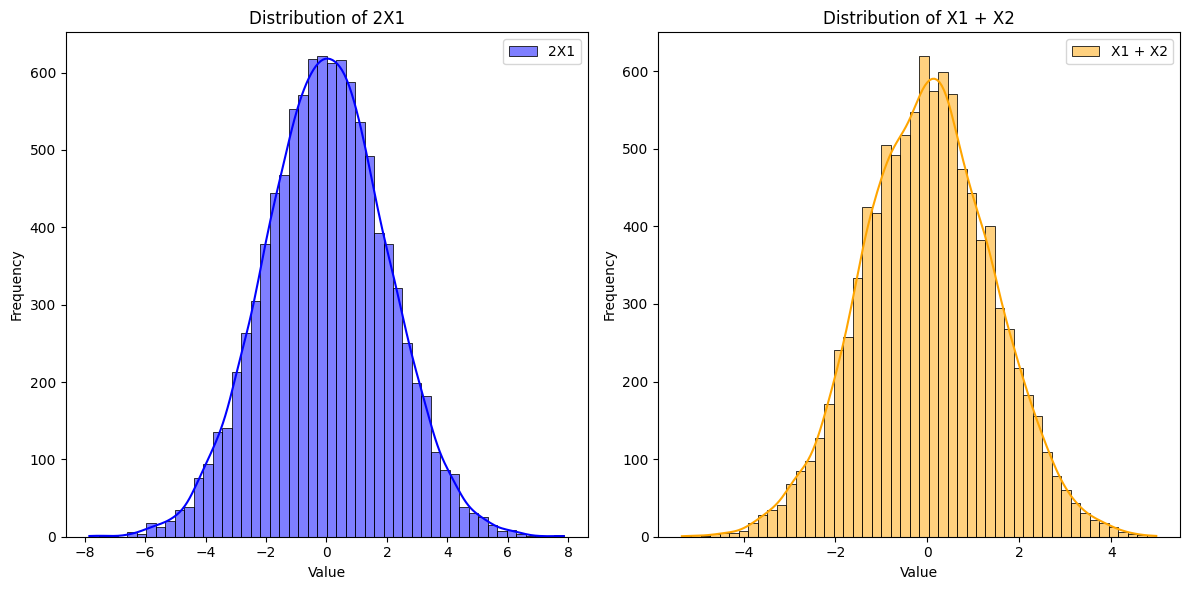

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters
mu = 0
sigma = 1

# Generate random samples
np.random.seed(42)
X1 = np.random.normal(mu, sigma, 10000)
X2 = np.random.normal(mu, sigma, 10000)

# Calculate 2X1 and X1 + X2
X_2X1 = 2 * X1
X_sum = X1 + X2

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot for 2X1
plt.subplot(1, 2, 1)
sns.histplot(X_2X1, bins=50, kde=True, color='blue', label='2X1')
plt.title('Distribution of 2X1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Plot for X1 + X2
plt.subplot(1, 2, 2)
sns.histplot(X_sum, bins=50, kde=True, color='orange', label='X1 + X2')
plt.title('Distribution of X1 + X2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# Question 4

In [5]:
import scipy.stats as stats

# Given parameters
mean = 100
std_dev = 20
confidence_interval = 0.99

# Find the z-scores corresponding to the tails of the distribution
tail_probability = (1 - confidence_interval) / 2
z_score = stats.norm.ppf(1 - tail_probability)

# Calculate a and b
a = mean - z_score * std_dev
b = mean + z_score * std_dev

print(f"The values a and b are: {a:.1f}, {b:.1f}")


The values a and b are: 48.5, 151.5


# Question 5

# a

In [6]:
import scipy.stats as stats

# Given parameters
mean_profit1 = 5
std_dev_profit1 = 3
mean_profit2 = 7
std_dev_profit2 = 4
conversion_rate = 45

# Calculate mean and standard deviation for the total profit
mean_total_profit = mean_profit1 + mean_profit2
std_dev_total_profit = (std_dev_profit1**2 + std_dev_profit2**2)**0.5

# Convert to Rupees
mean_total_profit_rupees = mean_total_profit * conversion_rate
std_dev_total_profit_rupees = std_dev_total_profit * conversion_rate

# Calculate the Rupee range for 95% probability
lower_bound = mean_total_profit_rupees - 1.96 * std_dev_total_profit_rupees
upper_bound = mean_total_profit_rupees + 1.96 * std_dev_total_profit_rupees

print(f"A. Rupee range for 95% probability: ({lower_bound:.2f} Rs, {upper_bound:.2f} Rs)")


A. Rupee range for 95% probability: (99.00 Rs, 981.00 Rs)


# b

In [7]:
# Calculate the 5th percentile for the total profit
percentile_5_rupees = stats.norm.ppf(0.05, loc=mean_total_profit_rupees, scale=std_dev_total_profit_rupees)

print(f"B. 5th percentile of profit: {percentile_5_rupees:.2f} Rs")


B. 5th percentile of profit: 169.91 Rs


# c

In [8]:
# Calculate the probability of Profit1 being negative
prob_loss_profit1 = stats.norm.cdf(0, loc=mean_profit1, scale=std_dev_profit1)

# Calculate the probability of Profit2 being negative
prob_loss_profit2 = stats.norm.cdf(0, loc=mean_profit2, scale=std_dev_profit2)

# Compare the probabilities
if prob_loss_profit1 > prob_loss_profit2:
    larger_loss_probability = "Profit1"
else:
    larger_loss_probability = "Profit2"

print(f"C. The division with a larger probability of making a loss: {larger_loss_probability}")


C. The division with a larger probability of making a loss: Profit1


# SET_3

# Question 5

In [10]:
from scipy.stats import binom_test

# Assuming the sample size and observed proportion
n = 2000
p_observed = 0.046  # 4.6% as a decimal

# Hypothesized proportion under the null hypothesis
p_hypothesized = 0.05  # 5% as a decimal

# Perform a one-sided binomial test
p_value = binom_test(int(n * p_observed), n, p_hypothesized, alternative='less')

# Compare the p-value to the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that Mozilla has less than a 5% market share.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude Mozilla has less than a 5% market share.")


Fail to reject the null hypothesis. There is not enough evidence to conclude Mozilla has less than a 5% market share.


<ipython-input-10-b1675fcddd4e>:11: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(int(n * p_observed), n, p_hypothesized, alternative='less')


# Question 8

In [11]:
import math

def calculate_minimum_sample_size(confidence_level, margin_of_error, estimated_proportion=None):
    # Z-score for the desired confidence level
    z_score = 1.96  # for a 95% confidence level

    # Estimated proportion (use 0.5 if not provided)
    p = estimated_proportion if estimated_proportion is not None else 0.5

    # Calculate minimum sample size formula
    n = math.ceil((z_score**2 * p * (1 - p)) / margin_of_error**2)

    return n

# Input parameters
confidence_level = 0.95  # 95% confidence level
margin_of_error = 0.04  # 4% margin of error

# Calculate minimum sample size
minimum_sample_size = calculate_minimum_sample_size(confidence_level, margin_of_error)

print(f"The minimum number of randomly selected employers is: {minimum_sample_size}")


The minimum number of randomly selected employers is: 601


# Question 9

In [15]:
import math

def calculate_minimum_sample_size(confidence_level, margin_of_error, estimated_proportion=None):
    # Z-score for the desired confidence level
    z_score = 2.33  # for a 98% confidence level

    # Estimated proportion (use 0.5 if not provided)
    p = estimated_proportion if estimated_proportion is not None else 0.5

    # Calculate minimum sample size formula
    n = math.ceil((z_score**2 * p * (1 - p)) / margin_of_error**2)

    return n

# Input parameters
confidence_level = 0.98  # 98% confidence level
margin_of_error = 0.04  # 4% margin of error

# Calculate minimum sample size
minimum_sample_size = calculate_minimum_sample_size(confidence_level, margin_of_error)
print(minimum_sample_size)
print(f"The minimum number of randomly selected employers is: {minimum_sample_size}")


849
The minimum number of randomly selected employers is: 849


# SET_4

#Question 3

In [16]:
pip install scipy


In [17]:
from scipy.stats import norm

# Given data
population_mean = 50
population_stddev = 40
sample_size = 100
sample_mean_range = (45, 55)

# Calculate standard error of the mean (SE)
se = population_stddev / (sample_size ** 0.5)

# Calculate z-scores for the lower and upper limits
z_lower = (sample_mean_range[0] - population_mean) / se
z_upper = (sample_mean_range[1] - population_mean) / se

# Calculate probabilities
prob_lower = norm.cdf(z_lower)
prob_upper = 1 - norm.cdf(z_upper)

# Probability of investigation (outside the range)
prob_investigation = prob_lower + prob_upper

print(f"The probability of investigation is: {prob_investigation:.4f}")


The probability of investigation is: 0.2113


# Question 4

In [21]:
from scipy.stats import t
import numpy as np

# Given data
population_mean = 50
target_probability = 0.05
margin_of_error = 5  # half the width of the desired confidence interval
sample_standard_deviation = 40

# Calculate the t-value corresponding to the target probability and degrees of freedom (assuming large sample)
degrees_of_freedom = np.inf  # large sample, so degrees of freedom approaches infinity
t_value = t.ppf(1 - target_probability / 2, df=degrees_of_freedom)

# Calculate the required sample size using the margin of error formula
required_sample_size = ((sample_standard_deviation * t_value) / margin_of_error)**2

print(f"The minimum number of transactions required is: {required_sample_size:.2f}")


The minimum number of transactions required is: 245.85


# Question 5

In [22]:
pip install numpy


In [23]:
import numpy as np

# Given data
population_mean = 720
population_stddev = 120
sample_size = 30  # Assuming a moderate sample size

# Simulate random samples
num_samples = 1000
samples = np.random.normal(population_mean, population_stddev, size=(num_samples, sample_size))

# Calculate statistics for individual samples
sample_stddevs = np.std(samples, axis=1)
sample_means = np.mean(samples, axis=1)

# Calculate statistics across several samples
average_sample_mean = np.mean(sample_means)
stddev_of_means = np.std(sample_means)

# Display results
print(f"A. Standard deviation of scores within any sample: {np.mean(sample_stddevs):.2f}")
print(f"B. Standard deviation of the mean across several samples: {stddev_of_means:.2f}")
print(f"C. Mean score in any sample: {np.mean(sample_means):.2f}")
print(f"D. Average of the mean across several samples: {average_sample_mean:.2f}")
print(f"E. Standard deviation of the mean across several samples: {np.std(sample_means):.2f}")


A. Standard deviation of scores within any sample: 116.66
B. Standard deviation of the mean across several samples: 22.77
C. Mean score in any sample: 719.46
D. Average of the mean across several samples: 719.46
E. Standard deviation of the mean across several samples: 22.77
